In [1]:
import os
import json
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
# Set seed
np.random.seed(42)

# set font to 12 and times new roman

plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Times New Roman"

from utils import *





In [2]:

os.chdir(r"..") # should be the git repo root directory, checking below:
print("Current working directory: " + os.getcwd())
assert os.getcwd()[-8:] == "WattCast"

Current working directory: c:\Users\nik\Desktop\Berkeley_Projects\WattCast


In [3]:
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: nikolaushouben (wattcast). Use `wandb login --relogin` to force relogin


True

## Results imports

Grabbing all metrics from all runs from wandb

In [4]:
run = wandb.init(project='Wattcast', name='results_synthesis', id = 'results_synthesis', resume=True)


In [5]:
project_name = "Wattcast"

# Initialize your project
api = wandb.Api()
runs = api.runs(project_name)


name_id_dict = {}

for run_ in runs:
    l = run_.name.split('_')[:-1]
    l.insert(2, 'in')
    n = '_'.join(l)
    # remove the _ around in
    n = n.replace('_in_', 'in')
    name_id_dict[n] = run_.id

In [6]:
name_id_dict

{'results_in': 'results_synthesis',
 '3_villageinvillage_2': '3_village_village_2_60min',
 '3_villageinvillage_1': '3_village_village_1_60min',
 '3_villageinvillage_0': '3_village_village_0_60min',
 '2_townintown_2': '2_town_town_2_60min',
 '2_townintown_1': '2_town_town_1_60min',
 '2_townintown_0': '2_town_town_0_60min',
 '1_countyinSacramento': '1_county_Sacramento_60min',
 '1_countyinNew_York': '1_county_New_York_60min',
 '1_countyinLos_Angeles': '1_county_Los_Angeles_60min',
 '4_neighborhoodingermany': '4_neighborhood_germany_60min'}

In [7]:
# importing error metric tables
key_list = list(name_id_dict.keys())
for key in key_list:
    if key[0] not in ['1', '2', '3', '4', '5']:
        del name_id_dict[key]
        
dfs_sorted = {}
for name, id in name_id_dict.items():
    try:
        run_path = f'wattcast/{project_name}/run-{id}-Errormetrics:latest'
        artifact = run.use_artifact(f'{run_path}', type='run_table')
        artifact_dir = artifact.download()
        with open(os.path.join(artifact_dir, os.listdir(artifact_dir)[0])) as f:
            data = json.load(f)
        df_metrics = pd.DataFrame(data['data'], columns=data['columns'])
        df = df_metrics.sort_values(by=['model', 'season'])
        dfs_sorted[name] = df
    except:
        print(f'Error in {name}')


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


## Results Exploration (Interactive Plots)

[![](https://raw.githubusercontent.com/wandb/assets/main/wandb-github-badge-gradient.svg)](https://wandb.ai/wattcast/WattCast)


# Paper Figures & Tables

### Mappings for plotting shapes and colors

In [12]:


model2shape = {
    'RandomForest': 'o',
    'LightGBMModel': 's',
    'XGBModel': 'D',
    'BlockRNNModel': 'x',
    'NBEATSModel': '^',
    'TFTModel': 'v',
    'LinearRegressionModel': '*',
    '48-Hour Persistence': 'P'
}


model2color = {
    'RandomForest': 'blue',
    'LightGBMModel': 'orange',
    'XGBModel': 'green',
    'BlockRNNModel': 'red',
    'NBEATSModel': 'purple',
    'TFTModel': 'pink',
    'LinearRegressionModel': 'brown',
    '48-Hour Persistence': 'black'
}


shape2model = {v: k for k, v in model2shape.items()}


metric_dict = {'mape': 'Mean Absolute Percentage Error (MAPE)',
               'rmse': 'Root Mean Squared Error (RMSE)',
                'mae': 'Mean Absolute Error (MAE)',
                'smape': 'Symmetric Mean Absolute Percentage Error (SMAPE)',
                'rmse_skill_score': 'RMSE Skill Score',
                'r2_score': 'R2 Score',
                'max_peak_error': 'Max Peak Error',
                'mean_n_peak_error': 'Mean N Peak Error',
                }

season2color = {'Summer': 'orange', 'Winter': 'blue'}
color2season = {v: k for k, v in season2color.items()}

horizon2color = {'Ground Truth': 'black',
                '1 Hour Ahead': 'blue',
                '4 Hours Ahead': 'green',
                '8 Hours Ahead': 'orange',
                '24 Hours Ahead': 'red',
                '48 Hours Ahead': 'purple'}


model_groups = {'Tree-based': ['RandomForest', 'LightGBMModel', 'XGBModel'],
                         'Neural Network': ['BlockRNNModel', 'NBEATSModel', 'TFTModel'],}

model2group = {}
for group, models in model_groups.items():
    for model in models:
        model2group[model] = group


group2shape = {'Tree-based': 'x', 'Neural Network': 'o'}
shape2group = {v: k for k, v in group2shape.items()}

group2color = {'Tree-based': 'blue', 'Neural Network': 'red'}
color2group = {v: k for k, v in group2color.items()}




index2county_locations = {0: 'Los_Angeles', 1: 'New_York', 2: 'Sacramento'}
index2town_locations = {0: 'town_0', 1: 'town_1', 2: 'town_2'}
index2village_locations = {0: 'village_0', 1: 'village_1', 2: 'village_2'}
index2neighborhood_locations = {0: 'neighborhood_0', 1: 'neighborhood_1', 2: 'neighborhood_2'}
scale2ordering = {'county': index2county_locations, 'town': index2town_locations, 'village': index2village_locations, 'neighborhood': index2neighborhood_locations}



def get_best_model_per_scale_and_horizon(df, metric):
    # extract the model with the best performance for each scale and horizon
    df_sorted = df.sort_values(by=['scale', metric], ascending=False if metric == 'rmse_skill_score' else True)
    df_sorted = df_sorted.drop_duplicates(subset=['scale', 'horizon_in_hours'], keep='first')
    df_sorted = df_sorted.sort_values(by=['scale', 'horizon_in_hours'])
    df_sorted = df_sorted.reset_index(drop=True).sort_values(by=['scale', 'horizon_in_hours'])
    return df_sorted

## Per Model

### Plot 1: Skill Score vs Horizon for each model and season

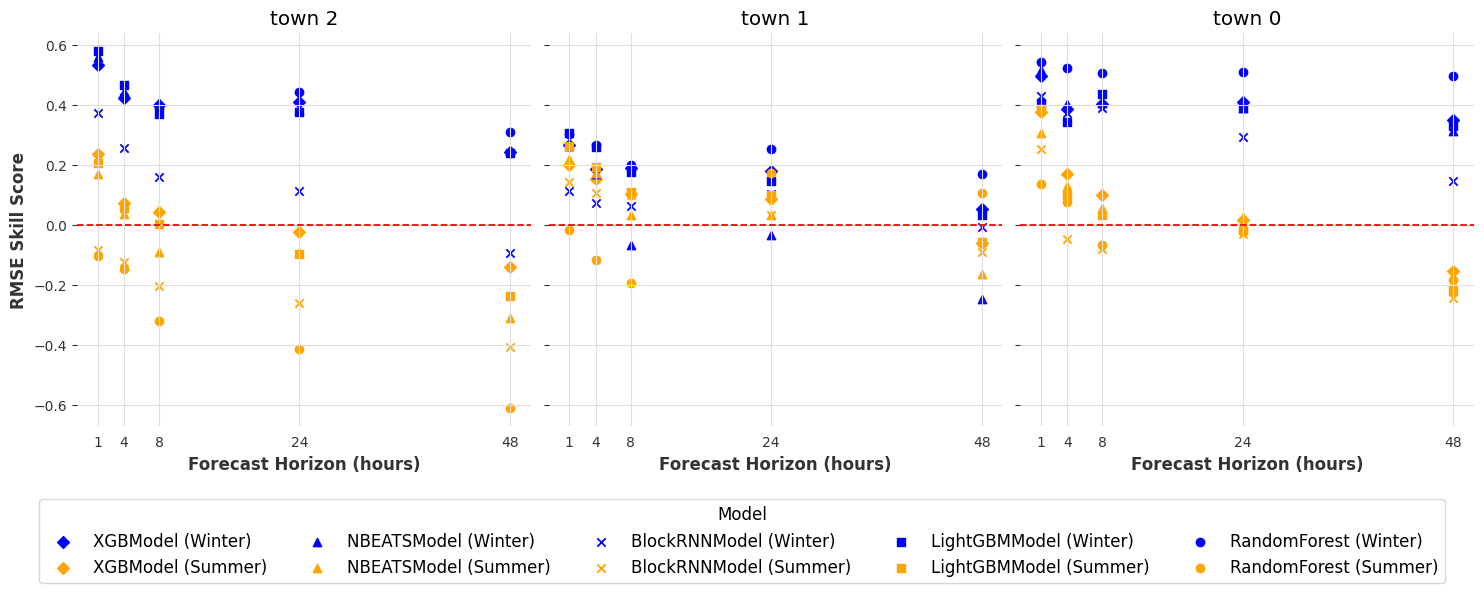

In [9]:
# Set these:

spatial_scale = 'town'
metric_of_interest = 'rmse_skill_score'


dfs_sorted_plot = dfs_sorted.copy()
keys = list(dfs_sorted_plot.keys())
for key in keys:
    if not spatial_scale in key:
        del dfs_sorted_plot[key]



fig, axs = plt.subplots(1, len(dfs_sorted_plot), figsize=(5*(len(dfs_sorted_plot)),5), sharex=True, sharey=True)

    
axs = axs.ravel()

# Create a list to store the handles and labels for the legend
legend_handles = []
legend_labels = []

for i, ax in enumerate(axs):
    # Map the colors and shapes to the DataFrame
    name, df = list(dfs_sorted_plot.items())[i]
    df['color'] = df['season'].map(season2color)
    df['shape'] = df['model'].map(model2shape)

    # exclude 24 hour persistence
    df = df.loc[ df['model'] != '48-Hour Persistence']
    
    for shape in set(df['shape']):
        for color in set(df.loc[df['shape'] == shape, 'color']):
            x = df.loc[(df['shape'] == shape) & (df['color'] == color), 'horizon_in_hours']
            y = df.loc[(df['shape'] == shape) & (df['color'] == color), metric_of_interest]
            label = f'{shape2model[shape]} ({color2season[color]})'
            scatter = ax.scatter(x, y, c=color, marker=shape, label=label)
            if label not in legend_labels:
                legend_handles.append(scatter)
                legend_labels.append(label)

    # Set the x ticks and labels
    ax.set_xticks([1, 4, 8, 24, 48])
    ax.set_xlabel('Forecast Horizon (hours)')

    # Set the y label
    if i == 0:
        ax.set_ylabel(f'{metric_dict[metric_of_interest]}')

    # Set the title for each subplot
    ax.set_title(f'{name.split("in")[-1].replace("_", " ")}')

    # Add grid for each subplot
    ax.grid(True)

    # Add a horizontal red dashed line at y = 0
    if metric_of_interest == 'rmse_skill_score':
        ax.axhline(y=0, color='red', linestyle='--')

# Create a single legend for all subplots
fig.legend(handles=legend_handles, labels=legend_labels, title='Model', loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=5, frameon=True)

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
for format in ['png', 'pdf']:
    fig.savefig(os.path.join(os.getcwd(),'imgs','figures',f'{spatial_scale}{metric_of_interest}.{format}'), bbox_inches='tight')

### Plot 2: Side by side comparison of models for each season for a selected week

In [10]:
name_id_dict

{'3_villageinvillage_2': '3_village_village_2_60min',
 '3_villageinvillage_1': '3_village_village_1_60min',
 '3_villageinvillage_0': '3_village_village_0_60min',
 '2_townintown_2': '2_town_town_2_60min',
 '2_townintown_1': '2_town_town_1_60min',
 '2_townintown_0': '2_town_town_0_60min',
 '1_countyinSacramento': '1_county_Sacramento_60min',
 '1_countyinNew_York': '1_county_New_York_60min',
 '1_countyinLos_Angeles': '1_county_Los_Angeles_60min',
 '4_neighborhoodingermany': '4_neighborhood_germany_60min'}

In [ ]:
# set these
run_to_visualize = '1_countyinSacramento'
season = 'Summer'
algorithm = 'RandomForest'


scale = run_to_visualize.split('_')[1].split('in')[0]
units_dict = {'county': 'GW', 'town': 'MW', 'village': 'kW', 'neighborhood': 'kW'}
unit = units_dict[scale]

In [ ]:
run = api.run(f"wattcast/{project_name}/{name_id_dict[run_to_visualize]}")
files = []
for file in run.files():
    if 'Side' in str(file) and season in str(file):
        files.append(file)

side_by_side_plots_dict= download_plotly_plots(get_latest_plotly_plots(files))

In [ ]:

df_all = pd.DataFrame()
for name, plot in side_by_side_plots_dict.items():
    df = make_df_from_plot(plot)
    df.columns = [col + ' ' + name for col in df.columns]
    df_all = pd.concat([df_all, df], axis=1)



df_gt = df_all.filter(like='Ground').iloc[:,:1]
df_gt.columns = ['Ground Truth']


# find the day with the highest peak
dt_highest_peak = pd.Timestamp(df_gt['Ground Truth'].idxmax()).date()
dt_start = dt_highest_peak - pd.Timedelta(days=2)
dt_end = dt_highest_peak + pd.Timedelta(days=2)


df_predictions = df_all.filter(like=algorithm)



df_predictions.columns = [col.split(': ')[1] + ' Ahead' for col in df_predictions.columns]
df_predictions.rename(columns={'1 Hours Ahead': '1 Hour Ahead'}, inplace=True)
try:
    df_predictions = df_predictions[['1 Hour Ahead', '4 Hours Ahead', '8 Hours Ahead', '24 Hours Ahead', '48 Hours Ahead']]
except:
    pass

df_plot = pd.concat([df_predictions, df_gt], axis=1)
df_plot.index = pd.to_datetime(df_plot.index)
df_plot = df_plot.loc[dt_start:dt_end]



fig, ax = plt.subplots(figsize=(12,5))

for col in df_plot.columns:
    ax.plot(df_plot[col], label=col, color=horizon2color[col], linestyle= 'solid' if col == 'Ground Truth' else ':')

ax.set_ylabel(f'Electricity Load ({unit})')
ax.set_title(f'Ground Truth and {algorithm} Predictions for {run_to_visualize}')

ax.grid(True, axis='x')
ax.legend(frameon=True)



In [ ]:
for format in ['png', 'pdf']:
    fig.savefig(os.path.join(os.getcwd(),'imgs','figures',f'plot_3_side-by-side_horizons_heat_wave_{run_to_visualize}_{season}_{algorithm}.{format}'), bbox_inches='tight')

#wandb.log({f'plot_3_side-by-side_horizons_heat_wave_{run_to_visualize}_{season}_{algorithm}': wandb.Image(fig)})

### Plot 3: Comparing Spatial Scales (mean of seasons and datasets)

KeyError: nan

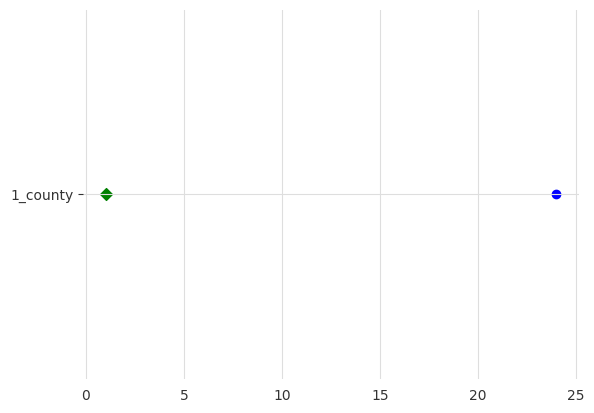

In [15]:
metric_of_interest = 'rmse'

df_metrics_all_scales = pd.DataFrame()

for scale, df in dfs_sorted.items():
    scale = scale.split('in')[0]
    df['scale'] = scale
    df_metrics_all_scales = df_metrics_all_scales.append(df)

# marginalize over the season
df_metrics_grouped = df_metrics_all_scales.groupby(['scale', 'model', 'horizon_in_hours']).mean()[[metric_of_interest]].reset_index()

# extract the model with the best performance for each scale and horizon
df_metrics_grouped = df_metrics_grouped.sort_values(by=['scale', metric_of_interest], ascending=False if metric_of_interest == 'rmse_skill_score' else True)
df_metrics_grouped = df_metrics_grouped.drop_duplicates(subset=['scale', 'horizon_in_hours'], keep='first')
df_metrics_grouped = df_metrics_grouped.sort_values(by=['scale', 'horizon_in_hours'])
df_metrics_grouped = df_metrics_grouped.reset_index(drop=True)


# Define colors and shapes based on the season and model
df = df_metrics_grouped
fig, ax = plt.subplots()

# Create a list to store the handles and labels for the legend
legend_handles = []
legend_labels = []


# Map the colors and shapes to the DataFrame
df['shape'] = df['model'].map(model2shape)


for scale, df_scale in df.groupby('scale'): # this for loop is to make sure the order of scales is from county to neighborhood
    for shape in set(df_scale['shape']):
        x = df_scale.loc[(df_scale['shape'] == shape), 'horizon_in_hours']
        y = df_scale.loc[(df_scale['shape'] == shape), 'scale']
        label = f'{shape2model[shape]}'
        scatter = ax.scatter(x, y, marker=shape, label=label, color=model2color[shape2model[shape]])
        if label not in legend_labels:
            legend_handles.append(scatter)
            legend_labels.append(label)

# Set the x ticks and labels
ax.set_xticks([1, 4, 8, 24, 48])
ax.set_xlabel('Forecast Horizon (hours)')


ax.set_ylabel('Spatial Scale')

# Set the title for each subplot
fig.suptitle(f'Best Model by {metric_dict[metric_of_interest]}')

# Create a single legend for all subplots
fig.legend(handles=legend_handles, labels=legend_labels, title='Model', loc='lower center', bbox_to_anchor=(0.6, -0.25), ncol=2, frameon=True)


# Show the plot
plt.show()


In [ ]:

for format in ['png', 'pdf']:
    fig.savefig(os.path.join(os.getcwd(),'imgs','figures',f'plot_1_overview_across_scales_{metric_of_interest}.{format}'), bbox_inches='tight')

#wandb.log({f'plot_1_overview_across_scales_{metric_of_interest}': fig})

### Plot 4: Comparing Spatial Scales (mean of datasets per season)

In [ ]:
df_metrics_all_scales = pd.DataFrame()

for scale, df in dfs_sorted.items():
    scale = scale.split('in')[0]
    df['scale'] = scale
    df_metrics_all_scales = df_metrics_all_scales.append(df)

df_metrics_grouped = df_metrics_all_scales.groupby(['season', 'scale', 'model', 'horizon_in_hours']).mean()[[metric_of_interest]].reset_index()

season = 'Winter'

fig, axs = plt.subplots(1,2, figsize=(12,5), sharex=True, sharey=True)

axs = axs.ravel()
# Create a list to store the handles and labels for the legend
legend_handles = []
legend_labels = []

for i, ax in enumerate(axs):

    season = list(season2color.keys())[i]

    df_metrics_grouped_season = df_metrics_grouped.loc[df_metrics_grouped['season'] == season]

    df = get_best_model_per_scale_and_horizon(df_metrics_grouped_season, metric_of_interest)

    shape2model = {v: k for k, v in model2shape.items()}

    # Map the colors and shapes to the DataFrame
    df['shape'] = df['model'].map(model2shape)

    for scale, df_scale in df.groupby('scale'):
        for shape in set(df_scale['shape']):
            x = df_scale.loc[(df_scale['shape'] == shape), 'horizon_in_hours']
            y = df_scale.loc[(df_scale['shape'] == shape), 'scale']
            label = f'{shape2model[shape]}'
            scatter = ax.scatter(x, y, marker=shape, label=label, color=model2color[shape2model[shape]])
            if label not in legend_labels:
                legend_handles.append(scatter)
                legend_labels.append(label)

    # Set the x ticks and labels
    ax.set_xticks([1, 4, 8, 24, 48])
    ax.set_xlabel('Forecast Horizon (hours)')
    
    #ax.set_yticklabels(sorted(ax.get_yticklabels(), key=lambda x: x.get_text()))


    # Set the y label
    if i == 0:
        ax.set_ylabel('Spatial Scale')

    # Set the title for each subplot
    ax.set_title(f'{season}')


# Create a single legend for all subplots
fig.legend(handles=legend_handles, labels=legend_labels, title='Model', loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2, frameon=True)

fig.suptitle(f'Best Model by {metric_dict[metric_of_interest]}')
# Adjust the spacing between subplots
#fig.tight_layout()

# Show the plot
plt.show()


## Tree-based models vs. Deep learning models

### Plot 1

In [ ]:
# Set these:

spatial_scale = 'village'
metric_of_interest = 'rmse_skill_score'

dfs_sorted_plot = dfs_sorted.copy()
keys = list(dfs_sorted_plot.keys())
for key in keys:
    if not spatial_scale in key:
        del dfs_sorted_plot[key]


# Define colors and shapes based on the season and model
color2season = {v: k for k, v in season2color.items()}
shape2model = {v: k for k, v in model2shape.items()}


fig, axs = plt.subplots(1, len(dfs_sorted_plot), figsize=(5*(len(dfs_sorted_plot)),5), sharex=True, sharey=True)
axs = axs.ravel()

# Create a list to store the handles and labels for the legend
legend_handles = []
legend_labels = []

for i, ax in enumerate(axs):
    # Map the colors and shapes to the DataFrame
    name, df = list(dfs_sorted_plot.items())[i]
    # exclude 24 hour persistence
    df = df.loc[df['model'] != '48-Hour Persistence']
    df['group'] = df['model'].map(model2group)
    df = df.groupby(['group', 'horizon_in_hours', 'season']).mean().reset_index()
    df['color'] = df['season'].map(season2color)
    df['shape'] = df['group'].map(group2shape)
    
    
    for shape in set(df['shape']):
        for color in set(df.loc[df['shape'] == shape, 'color']):
            x = df.loc[(df['shape'] == shape) & (df['color'] == color), 'horizon_in_hours']
            y = df.loc[(df['shape'] == shape) & (df['color'] == color), metric_of_interest]
            label = f'{shape2group[shape]} ({color2season[color]})'
            scatter = ax.scatter(x, y, c=color, marker=shape, label=label)
            if label not in legend_labels:
                legend_handles.append(scatter)
                legend_labels.append(label)

    # Set the x ticks and labels
    ax.set_xticks([1, 4, 8, 24, 48])
    ax.set_xlabel('Forecast Horizon (hours)')

    # Set the y label
    if i == 0:
        ax.set_ylabel(f'{metric_dict[metric_of_interest]}')

    # Set the title for each subplot
    ax.set_title(f'{name.split("in")[-1].replace("_", " ")}')

    # Add grid for each subplot
    ax.grid(True)

    # Add a horizontal red dashed line at y = 0
    if metric_of_interest == 'rmse_skill_score':
        ax.axhline(y=0, color='red', linestyle='--')

# Create a single legend for all subplots
fig.legend(handles=legend_handles, labels=legend_labels, title='Model', loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=5, frameon=True)

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


### Plot 3

In [ ]:
metric_of_interest = 'mape'

df_metrics_all_scales = pd.DataFrame()

for scale, df in dfs_sorted.items():
    scale = scale.split('in')[0]
    df['scale'] = scale
    df_metrics_all_scales = df_metrics_all_scales.append(df)

# marginalize over the season
df_metrics_grouped = df_metrics_all_scales.groupby(['scale', 'model', 'horizon_in_hours']).mean()[[metric_of_interest]].reset_index()

# extract the model with the best performance for each scale and horizon
df_metrics_grouped = df_metrics_grouped.sort_values(by=['scale', metric_of_interest], ascending=False if metric_of_interest == 'rmse_skill_score' else True)
df_metrics_grouped = df_metrics_grouped.drop_duplicates(subset=['scale', 'horizon_in_hours'], keep='first')
df_metrics_grouped = df_metrics_grouped.sort_values(by=['scale', 'horizon_in_hours'])
df_metrics_grouped = df_metrics_grouped.reset_index(drop=True)


# Define colors and shapes based on the season and model
df = df_metrics_grouped
shape2model = {v: k for k, v in model2shape.items()}

fig, ax = plt.subplots()

# Create a list to store the handles and labels for the legend
legend_handles = []
legend_labels = []


# Map the colors and shapes to the DataFrame
df['group'] = df['model'].map(model2group)
df = df.groupby(['group', 'horizon_in_hours', 'scale']).mean().reset_index()

df['shape'] = df['group'].map(group2shape)

for scale, df_scale in df.groupby('scale'): # this for loop is to make sure the order of scales is from county to neighborhood
    for shape in set(df_scale['shape']):
        x = df_scale.loc[(df_scale['shape'] == shape), 'horizon_in_hours']
        y = df_scale.loc[(df_scale['shape'] == shape), 'scale']
        label = f'{shape2group[shape]}'
        scatter = ax.scatter(x, y, marker=shape, label=label, color=group2color[shape2group[shape]])
        if label not in legend_labels:
            legend_handles.append(scatter)
            legend_labels.append(label)

# Set the x ticks and labels
ax.set_xticks([1, 4, 8, 24, 48])
ax.set_xlabel('Forecast Horizon (hours)')

ax.set_ylabel('Spatial Scale')

# Set the title for each subplot
fig.suptitle(f'Best Model by {metric_dict[metric_of_interest]}')

# Create a single legend for all subplots
fig.legend(handles=legend_handles, labels=legend_labels, title='Model', loc='lower center', bbox_to_anchor=(0.6, -0.25), ncol=2, frameon=True)


# Show the plot
plt.show()

for format in ['png', 'pdf']:
    fig.savefig(os.path.join(os.getcwd(),'imgs','figures',f'plot_1_overview_across_scales_{metric_of_interest}.{format}'), bbox_inches='tight')

#wandb.log({f'plot_1_overview_across_scales_{metric_of_interest}': fig})

In [ ]:
df